### Run UCSF Confocal Data

In [3]:
from at_synapse_detection import SynapseDetection as syn
from PIL import Image, ImageSequence
import numpy as np
from skimage import measure

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt

### Load Data

In [33]:
#Allocate Memory
red_channel = np.load('red_channel.npy')
green_channel = np.load('green_channel.npy')

In [35]:
red_channel = (red_channel/np.max(red_channel))*255
green_channel = (green_channel/np.max(green_channel))*255

<IPython.core.display.Javascript object>


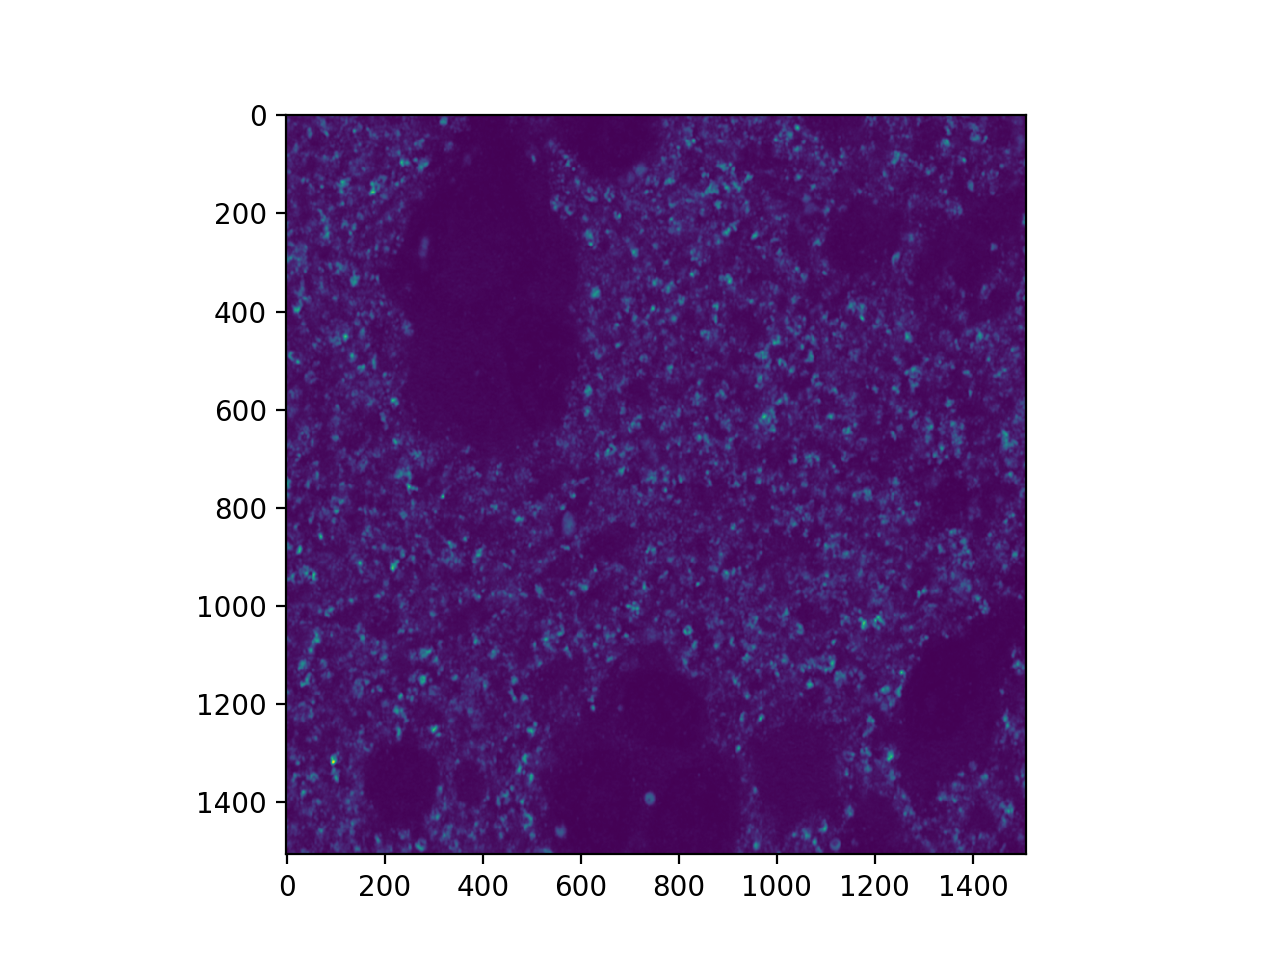

In [36]:
plt.figure()
plt.imshow(red_channel[:, :, 11])

In [23]:
probvol = syn.getProbMap(red_channel)

<IPython.core.display.Javascript object>


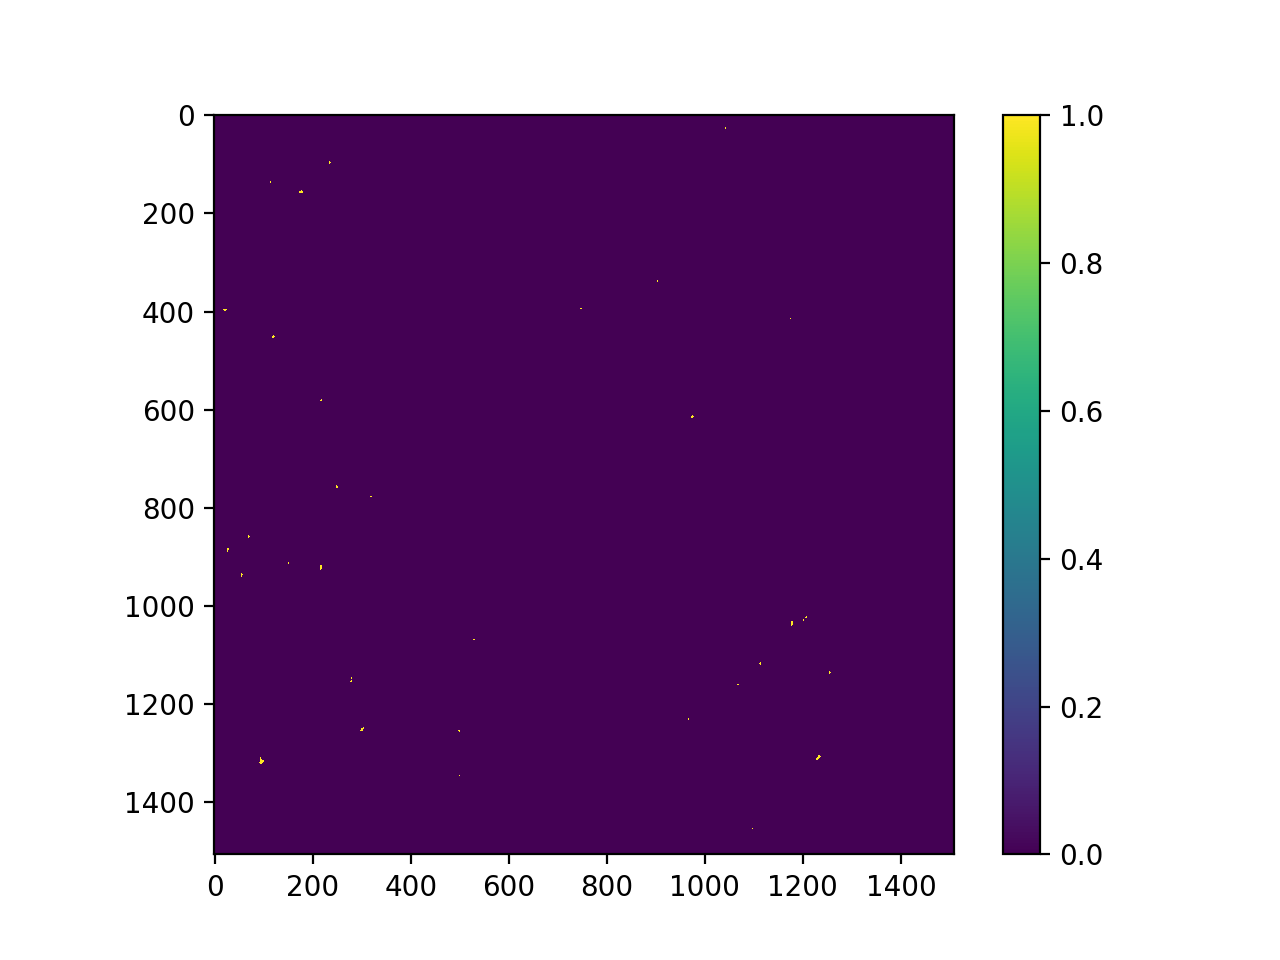

In [25]:
plt.figure()
plt.imshow(probvol[:, :, 11])
plt.colorbar()

In [29]:
red_channel8 = red_channel/np.max(red_channel)

<IPython.core.display.Javascript object>


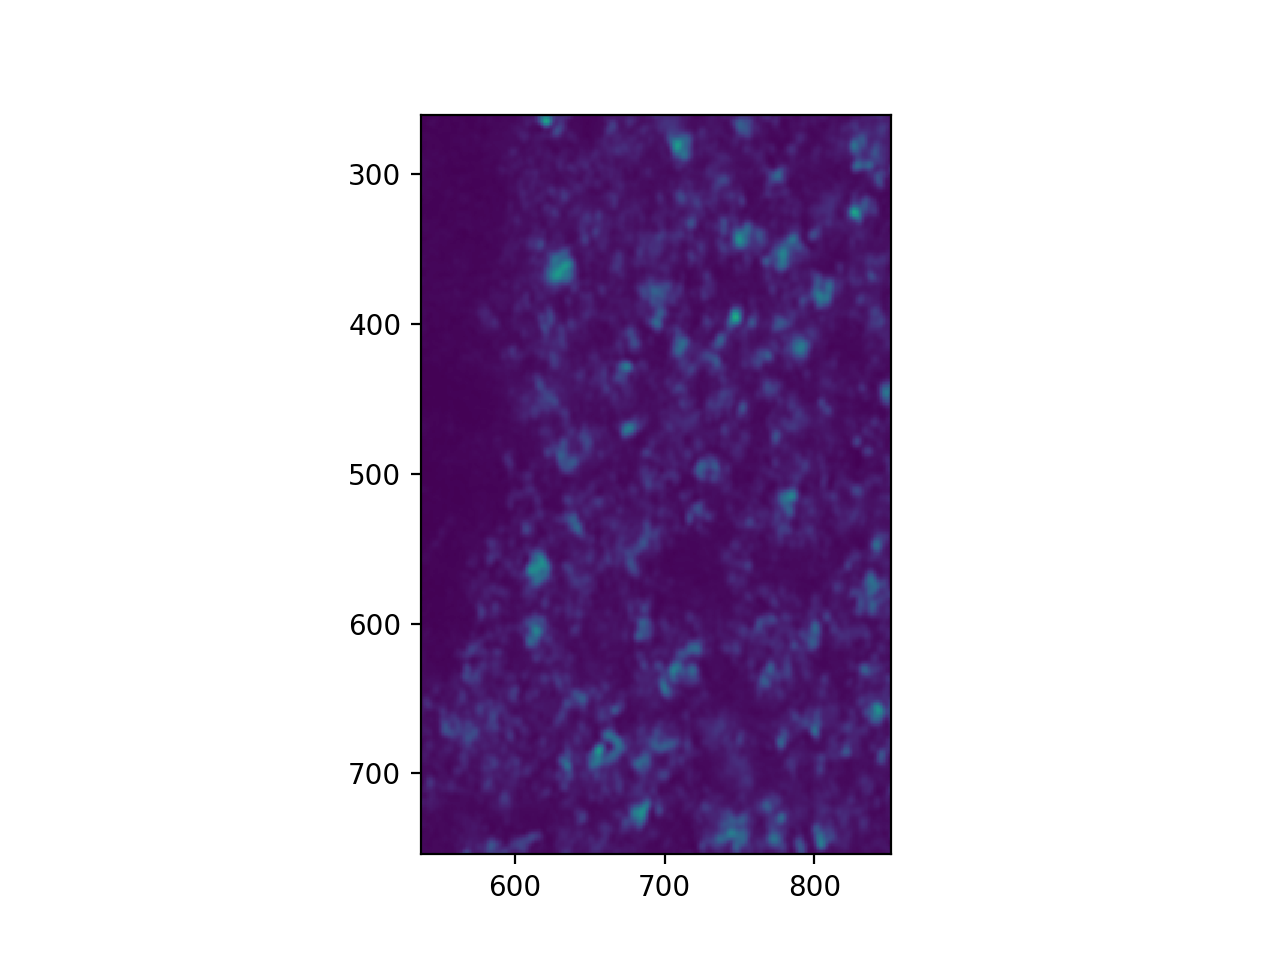

In [30]:
plt.figure()
plt.imshow(red_channel8[:, :, 11])

In [31]:
probvol = syn.getProbMap(np.copy(red_channel8))

<IPython.core.display.Javascript object>


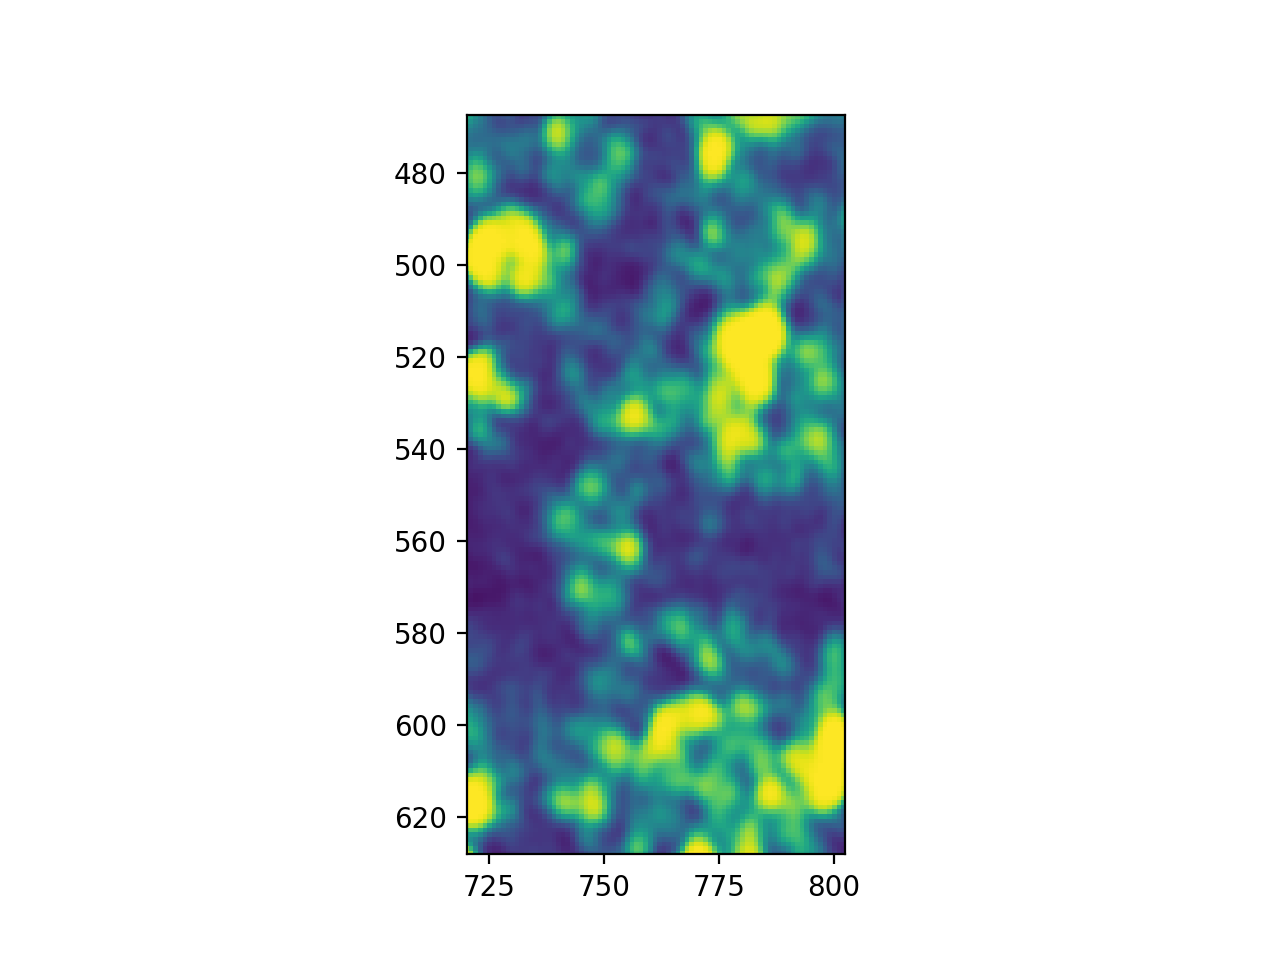

In [32]:
plt.figure()
plt.imshow(probvol[:, :, 11])

### Set up query

In [37]:
synaptic_volumes = {'presynaptic': [red_channel], 'postsynaptic': [green_channel]}

In [38]:
min_num_of_slices = 1

In [39]:
# Create query
query = {'preIF': ['red_channel'], 'preIF_z': [min_num_of_slices],
         'postIF': ['green_channel'], 'postIF_z': [min_num_of_slices],
         'punctumSize': 2}

### Run Synapse Detection 

In [40]:
resultVol = syn.getSynapseDetections(synaptic_volumes, query)

starting z ind: 0
starting z ind: 1
starting z ind: 2
starting z ind: 3
starting z ind: 4
starting z ind: 5
starting z ind: 6
starting z ind: 7
starting z ind: 8
starting z ind: 9
starting z ind: 10
starting z ind: 11
starting z ind: 12
starting z ind: 13
starting z ind: 14
starting z ind: 15
starting z ind: 16
starting z ind: 17
starting z ind: 18
starting z ind: 19
starting z ind: 20
starting z ind: 21
starting z ind: 22
starting z ind: 23
starting z ind: 24
starting z ind: 25
starting z ind: 26
starting z ind: 27
starting z ind: 28
starting z ind: 29
starting z ind: 30
starting z ind: 31
starting z ind: 32
starting z ind: 33
starting z ind: 34
starting z ind: 35
starting z ind: 36
starting z ind: 37
starting z ind: 38
starting z ind: 39
starting z ind: 40
starting z ind: 41
starting z ind: 42
starting z ind: 43
starting z ind: 44
starting z ind: 45
starting z ind: 46
starting z ind: 47


### Determine the amount of detections

In [41]:
resultVol.shape

(1508, 1508, 48)

In [42]:
thresh = 0.9
label_vol = measure.label(resultVol > thresh)
stats = measure.regionprops(label_vol)

In [43]:
len(stats)

11142

In [44]:
filename_base = 'confocal_1slice'

In [45]:
np.save(filename_base + '.npy', resultVol)

### Export to tiff

In [46]:
resultVol = np.load('confocal_1slice.npy')

In [47]:
import scipy.misc


In [49]:
bw_vol = resultVol > thresh
bw_vol = bw_vol*1
for n in range(0, resultVol.shape[2]): 
    scipy.misc.imsave('result_' + str(n+0).zfill(2) + '.tiff', bw_vol[:, :, n])

/Users/anish/anaconda3/envs/synapse_analysis/lib/python3.5/site-packages/ipykernel/__main__.py:4: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


### Plot synapse detections

In [8]:
#Allocate Memory
red_channel = np.zeros((1508, 1508, 24))
green_channel = np.zeros((1508, 1508, 24))

# Load Data
for n, slice_ind in enumerate(range(5, 29)): 
    base_fn = '../Synaptome-Duke/data/humansynapses/ucsf/S16080284_Synaptophysin-Spinophyllin_Airyscan_Z-stack_FOV_INS1_x60_Airyscan Processing_z' + \
          str(slice_ind).zfill(2) + 'c1+2.tif'
    
    im = Image.open(base_fn)
    img = np.array(im)
    red_channel[:, :, n] = img[:, :, 0]
    green_channel[:, :, n] = img[:, :, 1]
    

In [16]:
red_mean_list = [] 
green_mean_list = []
span = 3 

for synapse in stats: 
    bbox = synapse.bbox
    bbox = np.array(bbox)
    red_mean = np.mean(red_channel[bbox[0]-span:bbox[3]+span, bbox[1]-span:bbox[4]+span, bbox[2]:bbox[5]])
    green_mean = np.mean(green_channel[bbox[0]-span:bbox[3]+span, bbox[1]-span:bbox[4]+span, bbox[2]:bbox[5]])
    red_mean_list.append(red_mean)
    green_mean_list.append(green_mean)

/Users/anish/anaconda3/envs/synapse_analysis/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/anish/anaconda3/envs/synapse_analysis/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<IPython.core.display.Javascript object>


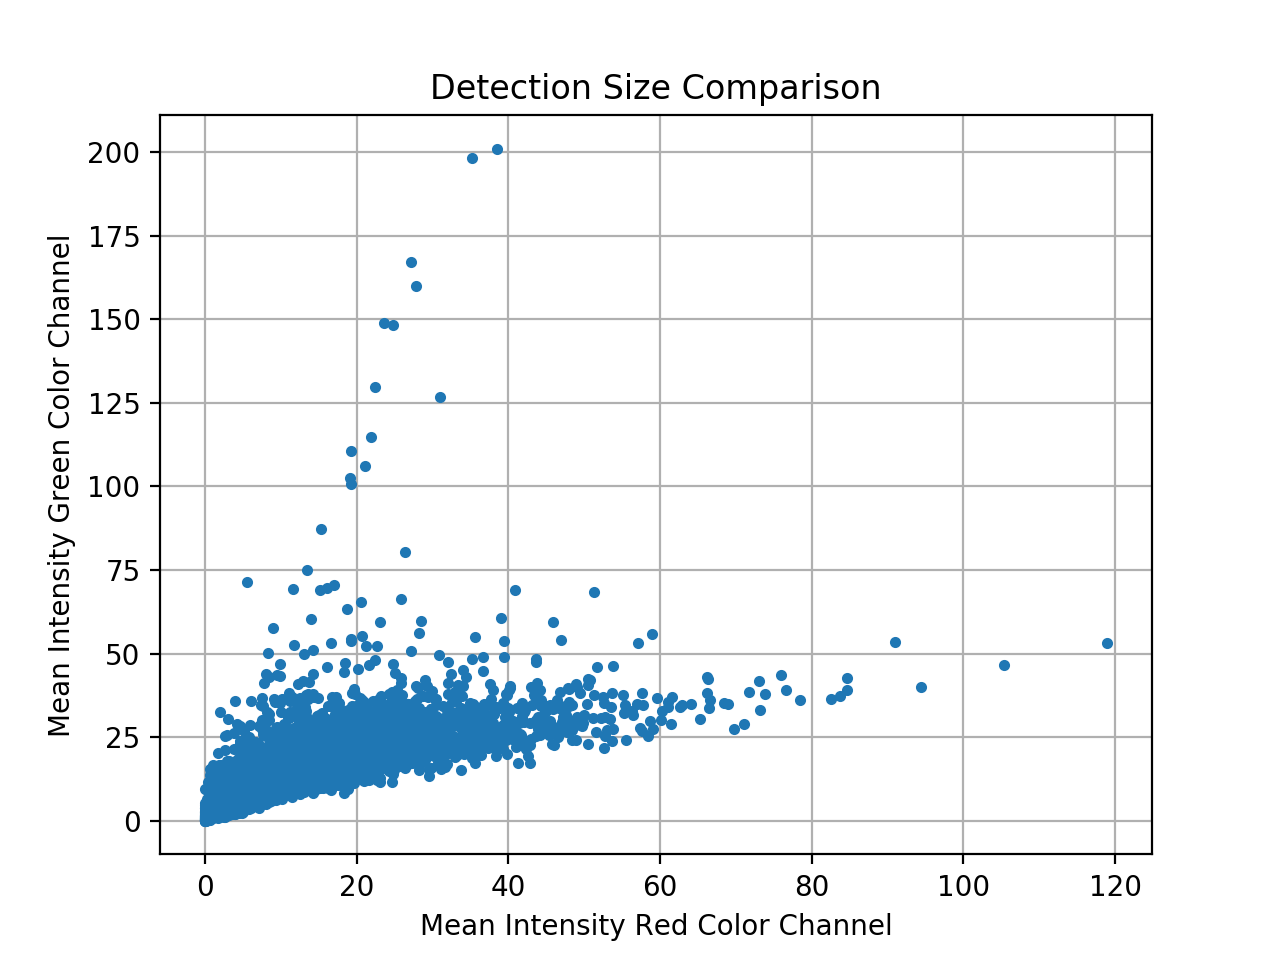

In [18]:
plt.figure()
plt.plot(red_mean_list, green_mean_list, ".")
plt.title('Detection Size Comparison')
plt.ylabel('Mean Intensity Green Color Channel')
plt.xlabel('Mean Intensity Red Color Channel')
plt.grid()
# plt.xlim((0, 130))
# plt.ylim((0, 210))
plt.savefig(filename_base + '_sum.png')



In [ ]:
# query

In [ ]:
# # Load Numpy 
# oneslice_vol = np.load('confocal_1slice.npy')

# thresh = 0.9
# label_vol = measure.label(oneslice_vol > thresh)
# stats = measure.regionprops(label_vol)


# red_mean_list = [] 
# green_mean_list = []
# span = 3 

# for synapse in stats: 
#     bbox = synapse.bbox
#     bbox = np.array(bbox)
#     red_mean = np.sum(red_channel[bbox[0]-span:bbox[3]+span, bbox[1]-span:bbox[4]+span, bbox[2]:bbox[5]])
#     green_mean = np.sum(green_channel[bbox[0]-span:bbox[3]+span, bbox[1]-span:bbox[4]+span, bbox[2]:bbox[5]])
#     red_mean_list.append(red_mean)
#     green_mean_list.append(green_mean)
    

In [ ]:
# plt.figure()
# plt.plot(red_mean_list, green_mean_list, ".")
# plt.title('Detection Size Comparison (Summed Intensity Values), 1slice')
# plt.ylabel('Green Color Channel')
# plt.xlabel('Red Color Channel')
# plt.grid()

# plt.savefig('summed_intensity_1slice_sum.png')

In [ ]:
# # Load Numpy 
# oneslice_vol = np.load('confocal_2slice.npy')

# thresh = 0.9
# label_vol = measure.label(oneslice_vol > thresh)
# stats = measure.regionprops(label_vol)


# red_mean_list = [] 
# green_mean_list = []
# span = 3 

# for synapse in stats: 
#     bbox = synapse.bbox
#     bbox = np.array(bbox)
#     red_mean = np.sum(red_channel[bbox[0]-span:bbox[3]+span, bbox[1]-span:bbox[4]+span, bbox[2]:bbox[5]])
#     green_mean = np.sum(green_channel[bbox[0]-span:bbox[3]+span, bbox[1]-span:bbox[4]+span, bbox[2]:bbox[5]])
#     red_mean_list.append(red_mean)
#     green_mean_list.append(green_mean)
    

In [ ]:
# plt.figure()
# plt.plot(red_mean_list, green_mean_list, ".")
# plt.title('Detection Size Comparison (Summed Intensity Values), 2slice')
# plt.ylabel('Green Color Channel')
# plt.xlabel('Red Color Channel')
# plt.grid()

# plt.savefig('summed_intensity_2slice_sum.png')

In [ ]:
# # Load Numpy 
# oneslice_vol = np.load('confocal_3slice.npy')

# thresh = 0.9
# label_vol = measure.label(oneslice_vol > thresh)
# stats = measure.regionprops(label_vol)


# red_mean_list = [] 
# green_mean_list = []
# span = 3 

# for synapse in stats: 
#     bbox = synapse.bbox
#     bbox = np.array(bbox)
#     red_mean = np.sum(red_channel[bbox[0]-span:bbox[3]+span, bbox[1]-span:bbox[4]+span, bbox[2]:bbox[5]])
#     green_mean = np.sum(green_channel[bbox[0]-span:bbox[3]+span, bbox[1]-span:bbox[4]+span, bbox[2]:bbox[5]])
#     red_mean_list.append(red_mean)
#     green_mean_list.append(green_mean)
    

In [ ]:
# plt.figure()
# plt.plot(red_mean_list, green_mean_list, ".")
# plt.title('Detection Size Comparison (Summed Intensity Values), 3slice')
# plt.ylabel('Green Color Channel')
# plt.xlabel('Red Color Channel')
# plt.grid()

# plt.savefig('summed_intensity_3slice_sum.png')